In [6]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
import pandas as pd
import numpy as np
import math
import os
from sklearn.cluster import DBSCAN
from analyze import readtext,nanotube,fit
from tool.selectSuffix import selectSuffix


In [7]:
    fdir=r'K:\模拟结果\nanotube的模拟结果\nanotube-Hz-R50-r40.out'
    fnames=selectSuffix(fdir,'.ovf')[1][480:485]
    n=nanotube.Nanotube(os.path.join(fdir,fnames[0]))
    f=fit.Fit(maxSkyr=10)
    for i in fnames:
        n.loadData(os.path.join(fdir,i))
        csl=n.reshape3D().circleSlicing(rclip=[49e-9,50e-9])
        x,y=n.xyz2xy(csl[:3])
        xydensity,Q = n.calQN([x,y,csl[3],csl[4],csl[5]])
        m=csl[5]
        

    
        f.fit([x,y,m],Q,index=i)
        
    f.DF.to_excel('a.xlsx')


index:m000480.ovf, 	Q:-9.661693917963406,	 skyrNum:10
index:m000481.ovf, 	Q:-9.65007987809393,	 skyrNum:10
m000481.ovf 2.5442953711095827e-10
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
m000481.ovf 0.0
index:m000482.ovf, 	Q:-9.638649948658294,	 skyrNum:10
m000482.ovf 2.472132140320829e-10
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
m000482.ovf 0.0
index:m000483.ovf, 	Q:-9.627410620995905,	 skyrNum:10
m000483.ovf 2.3449298250204596e-10
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
m000483.ovf 0.0
index:m000484.ovf, 	Q:-9.616358215268521,	 skyrNum:10
m000484.ovf 2.2199272515628318e-10
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0
m000484.ovf 0.0


In [40]:
a=pd.read_excel('a.xlsx')

In [41]:
a

,circleD0,circleX0,circleY0,ellipseA0,ellipseB0,ellipseX0,ellipseY0,ellipseQ0,circleD1,circleX1,...,ellipseY8,ellipseQ8,circleD9,circleX9,circleY9,ellipseA9,ellipseB9,ellipseX9,ellipseY9,ellipseQ9
m000480.ovf,3.411740e-08,2.715084e-07,7.698823e-08,0,0,0,0,0,3.429990e-08,3.430561e-07,...,0,0,3.429990e-08,5.694388e-08,2.369542e-07,0,0,0,0,0
m000481.ovf,3.354631e-08,2.714094e-07,7.717471e-08,0,0,0,0,0,3.378589e-08,3.428496e-07,...,0,0,3.378590e-08,5.715037e-08,2.368056e-07,0,0,0,0,0
m000482.ovf,3.306087e-08,2.713033e-07,7.718050e-08,0,0,0,0,0,3.327127e-08,3.426528e-07,...,0,0,3.327127e-08,5.734716e-08,2.366559e-07,0,0,0,0,0
m000483.ovf,3.257563e-08,2.712040e-07,7.719578e-08,0,0,0,0,0,3.276043e-08,3.424688e-07,...,0,0,3.276043e-08,5.753119e-08,2.365106e-07,0,0,0,0,0
m000484.ovf,3.208762e-08,2.711056e-07,7.719740e-08,0,0,0,0,0,3.225679e-08,3.422935e-07,...,0,0,3.225679e-08,5.770655e-08,2.363745e-07,0,0,0,0,0


In [46]:
f.circlexy

[[1, 2],
 [8, 9],
 [15, 16],
 [22, 23],
 [29, 30],
 [36, 37],
 [43, 44],
 [50, 51],
 [57, 58],
 [64, 65],
 [71, 72],
 [78, 79]]

In [29]:
a=[1.285906e-07,7.773027e-08]
b=[5.71503693e-08,2.36805570e-07]

In [33]:
np.sqrt(np.sum([(j-b[i])**2 for i,j in enumerate(a)]))

1.743807834383113e-07

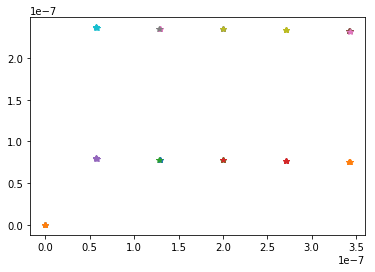

In [45]:
for i in f.circlexy:
    df=f.DF.iloc[:,i]
    plt.plot(df.iloc[:,0],df.iloc[:,1],'*',label=i[0],alpha=1)

#plt.legend()
plt.show()